In [1]:
import requests
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack

In [2]:
housing_data_url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale'
data = requests.get(housing_data_url)
housing_svmlight_file_name = 'housing_scale.svm'
with open(housing_svmlight_file_name, 'w') as f:
    f.write(data.text)

In [3]:
housing_svmlight_file_name = 'housing_scale.svm'
X, y = load_svmlight_file(housing_svmlight_file_name)

In [16]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)

In [17]:
def linear_fn(x, w):
    return x.dot(w)

In [18]:
def loss_fn(x, y, w):
    m = len(y)
    return np.sum((x.dot(w) - y) ** 2) / (2 * m)

In [87]:
def gradient_descent(x, y, w=None, alpha=0.001, iterations=10000):
    x0 = np.ones((len(y), 1))
    x = hstack([x0, x])
    if w == None:
        w = np.zeros(x.shape[1])
    
    loss_history = [0] * iterations
    m = len(y)
    
    for iteration in range(iterations):
        h = x.dot(w)
        loss = h - y
        
        gradient = x.T.dot(loss) / m
        w = w - alpha * gradient
        loss = loss_fn(x, y, w)
        loss_history[iteration] = loss
        
    return w, loss_history

In [88]:
new_w, loss_history = gradient_descent(X_train, y_train)
print(new_w)
print(loss_history[-1])

[ 7.92828238 -6.63530036 -0.24152421 -2.31444085  0.84210302 -2.6646944
  6.9891492   0.26644843 -5.08218396  2.0456097  -0.10736234 -4.57396418
  3.02783352 -9.70105845]
12.865417919


In [100]:
_, loss_history_validation = gradient_descent(X_validation, y_validation)

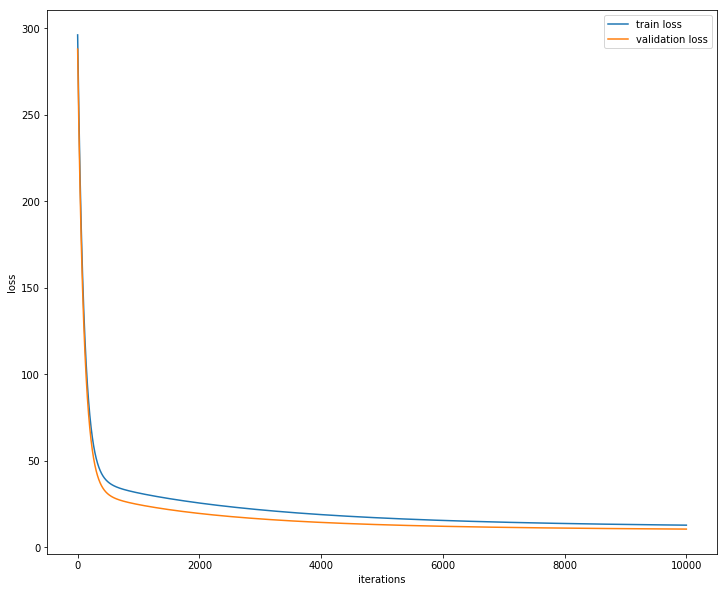

In [101]:
plt.figure('loss', figsize=(12, 10))
plt.plot(loss_history, label='train loss')
plt.plot(loss_history_validation, label='validation loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()